# Basic NLP Tasks with NLTK

## Importing resources

In [2]:
import nltk
#nltk.download('gutenberg')
#nltk.download('genesis')
#nltk.download('inaugural')
#nltk.download('nps_chat')
#nltk.download('webtext')
#nltk.download('treebank')
#nltk.download('udhr')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('tagsets')
#nltk.download('averaged_perceptron_tagger')

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Exploring the data

In [3]:
# look at a text
text1

<Text: Moby Dick by Herman Melville 1851>

In [4]:
# view the first sentence of the text
sent1

['Call', 'me', 'Ishmael', '.']

In [5]:
# see how long the text is
len(text1)

260819

In [6]:
# or how long a sentence is
len(sent1)

4

In [7]:
# how many unique words in a text?
len(set(text1))

19317

In [8]:
# what are the first 10 unique words?
list(set(text1))[:10]

['whalin',
 'd',
 'identity',
 'purest',
 'mess',
 'sledge',
 'ideas',
 'balmed',
 'wert',
 'PAID']

In [9]:
# what are the first 10 unique words in alphabetical order?
list(sorted(set(text1)))[:10]

['!', '!"', '!"--', "!'", '!\'"', '!)', '!)"', '!*', '!--', '!--"']

In [10]:
# frequency of words in a text
dist = FreqDist(text1)
print('There are ', len(dist), 'words in the distribution.')
vocab1 = dist.keys()
print('The first 10 words in the distribution are:\n', list(vocab1)[:10])
print('The word "whale" appears ', dist['whale'], 'times.')

There are  19317 words in the distribution.
The first 10 words in the distribution are:
 ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']
The word "whale" appears  906 times.


In [11]:
# filtering for certain types of words
# e.g. more than 5 letters, appears more than 100 times
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
freqwords

['called',
 'through',
 'almost',
 'whales',
 'thought',
 'before',
 'against',
 'towards',
 'things',
 'nothing',
 'without',
 'should',
 'little',
 'seemed',
 'though',
 'captain',
 'himself',
 'moment',
 'CHAPTER',
 'something',
 'Captain',
 'between',
 'whaling',
 'another',
 'Queequeg',
 'Pequod',
 'Starbuck']

## Working with words

### Normalization, stemming and lemmatization

In [12]:
# normalize
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

In [13]:
# get the stem for each word
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

In [14]:
# lemmatize each word
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in words1]

['list', 'listed', 'list', 'listing', 'listing']

In [15]:
# try with a different set of words

In [16]:
udhr = nltk.corpus.udhr.words('English-Latin1')
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [17]:
port = [porter.stem(t) for t in udhr[:20]]
WNlemma = nltk.WordNetLemmatizer()
lemma = [WNlemma.lemmatize(t) for t in udhr[:20]]
print(port, '\n', lemma)

['univers', 'declar', 'of', 'human', 'right', 'preambl', 'wherea', 'recognit', 'of', 'the', 'inher', 'digniti', 'and', 'of', 'the', 'equal', 'and', 'inalien', 'right', 'of'] 
 ['Universal', 'Declaration', 'of', 'Human', 'Rights', 'Preamble', 'Whereas', 'recognition', 'of', 'the', 'inherent', 'dignity', 'and', 'of', 'the', 'equal', 'and', 'inalienable', 'right', 'of']


### Pre-processing

In [18]:
# simple string split 
text11 = "Children shouldn't drink a sugary drink before bed." # a sample sentence
text11.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

In [19]:
# using nltk inbuilt 'tokenize' function
nltk.word_tokenize(text11)

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

In [20]:
# extracting sentences using another inbuilt function
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text12)
print('There are ', len(sentences), 'sentences.')
print('They are:\n', sentences)

There are  4 sentences.
They are:
 ['This is the first sentence.', 'A gallon of milk in the U.S. costs $2.99.', 'Is this the third sentence?', 'Yes, it is!']


### Recognising and tagging parts of speech

In [21]:
nltk.help.upenn_tagset('MD') # what does this do?

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


In [22]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
nltk.pos_tag(text14)

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

In [23]:
# Parsing sentence structure
text15 = nltk.word_tokenize("Alice loves Bob")
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob'
V -> 'loves'
""")

parser = nltk.ChartParser(grammar)
trees = parser.parse_all(text15)
for tree in trees:
    print(tree)

(S (NP Alice) (VP (V loves) (NP Bob)))


### POS tagging and parsing ambiguity

In [24]:
text18 = nltk.word_tokenize("The old man the boat")
nltk.pos_tag(text18)

[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

In [25]:
text19 = nltk.word_tokenize("Colorless green ideas sleep furiously")
nltk.pos_tag(text19)

[('Colorless', 'NNP'),
 ('green', 'JJ'),
 ('ideas', 'NNS'),
 ('sleep', 'VBP'),
 ('furiously', 'RB')]

## Putting the tools to work

### Sentiment analysis

In [26]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation (optional)
df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
42417,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,I brought the phone for my son and he loves it...,0.0
36001,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5,"Yay, it works!",0.0
50220,"Apple iPhone 5s Unlocked Cellphone, 64 GB, Gold",Apple,409.95,1,I bought a used iphone 5s from the seller mobi...,1.0
43607,Apple iPhone 5s 32GB (Gold) - T-Mobile,Apple,210.00,4,I gave it 4 star... it was a excellent,0.0
62427,"Apple iPhone 6, Gold, 128 GB (Verizon)",Apple,119.99,5,EXCELLENT PRODUCT...WITHOUT ANY MARKS OF USAGE,NaN


In [27]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3 (why do we do this?)
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
42417,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,5,I brought the phone for my son and he loves it...,0.0,1
36001,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5,"Yay, it works!",0.0,1
50220,"Apple iPhone 5s Unlocked Cellphone, 64 GB, Gold",Apple,409.95,1,I bought a used iphone 5s from the seller mobi...,1.0,0
43607,Apple iPhone 5s 32GB (Gold) - T-Mobile,Apple,210.00,4,I gave it 4 star... it was a excellent,0.0,1
35948,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,1,Did not function properly. Kinda wish my $80 b...,0.0,0


In [28]:
# Explore the data
# Are there more positive or more negative ratings in our sample?
df['Positively Rated'].mean()

0.755223880597015

### Train / Test split

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [30]:
# quick check to see what it looks like
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Worst phone I have ever bought haven't had it more then a month or two and it freezes, resets to factory on its own, glitches to black screens, and tries to load pages I haven't even asked it to load, it charges so slow and the battery life sucks horribly, it launches a Justin beiber song randomly that hangs up your phone calls, and won't stay locked, snaps countless pictures and videos randomly in your pocket even while having a password lock on it, I absolutely hate this phone and regret buying two of them, the one I bought my girlfriend didn't work from the moment I bought it, DO NOT BUY THIS PHONE!!!


X_train shape:  (4522,)


### Reshape the data as the model requires it - VECTORIZATION

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [32]:
vect.get_feature_names_out()[::2000]

array(['00', 'error', 'perfected', 'went'], dtype=object)

In [33]:
len(vect.get_feature_names_out())

6185

### Transform the training data and train the model

In [34]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<4522x6185 sparse matrix of type '<class 'numpy.int64'>'
	with 92917 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.linear_model import LogisticRegression

# Train the model (why have we chosen this one?)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

### Evaluate the model

In [36]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8846215735271845


In [37]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['horrible' 'not' 'poor' 'bad' 'fake' 'disappointed' 'terrible' 'dies'
 'broken' 'locked']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'nice' 'good' 'perfectly' 'amazing'
 'scratches' 'happy']


In [38]:
# BUT ... we have a problem!
# These 2 reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


## Using n-grams

In [62]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(3,5)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

AUC:  0.700458125094654
Smallest Coefs:
['does not work' 'do not buy' 'did not work' 'send it back'
 'is not working' 'to return it' 'am not satisfied'
 'disappointed with this' 'when got it' 'not brand new']

Largest Coefs: 
['love this phone' 'very happy with' 'as good as' 'in great condition'
 'it works great' 'for my daughter' 'phone is great' 'very good phone'
 'better than expected' 'exactly as described']


In [63]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


# Topic modelling

### Course and teaching reviews

In [50]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df = df.sample(frac=0.1, random_state=10)
df.head()

,Id,Review,Label
57729,57729,I took the course out of curiosity and really ...,5
1117,1117,I love this class. So much important history t...,5
61889,61889,VERY very good! it gave such a wonderful abili...,5
64137,64137,The information given is great so far. I would...,4
39678,39678,"Really fun, learned a lot about Technology",5


In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
df['polarity scores'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [52]:
df.head()

,Id,Review,Label,polarity scores
57729,57729,I took the course out of curiosity and really ...,5,0.5563
1117,1117,I love this class. So much important history t...,5,0.9295
61889,61889,VERY very good! it gave such a wonderful abili...,5,0.8875
64137,64137,The information given is great so far. I would...,4,0.8542
39678,39678,"Really fun, learned a lot about Technology",5,0.5563


In [53]:
import scipy.sparse as ss # for making sparse matrices
from corextopic import corextopic as ct # a topic modelling methodology

In [54]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True, binary=True)
corex_docs = df['Review'].tolist()
doc_word = vectorizer.fit_transform(corex_docs)
doc_word = ss.csr_matrix(doc_word)
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [56]:
target_num_topics = 5 # num topics CorEx will identify
topic_model = ct.Corex(n_hidden=target_num_topics, words=words, max_iter=1000, verbose=False, seed=2020)
topic_model.fit(doc_word, words=words);
topics = topic_model.get_topics()
for c in [col for col in df.columns if col.startswith('topic_')]:
    del df[c]
for topic_num in range(0, len(topics)):
    df['topic_' + str(topic_num)] = topic_model.log_p_y_given_x[:,topic_num]
corex_cols = [col for col in df if col.startswith('topic_')]
df['best_topic'] = df[corex_cols].idxmax(axis=1)

In [58]:
for n,topic in enumerate(topics):
    topic_words, foo, bar = zip(*topic)
    outText = 'topic_' + str(n) + ',' + ','.join(topic_words) + '\n'
    print(outText)

topic_0,time,videos,assignments,like,think,lectures,just,questions,video,make

topic_1,final,example,took,project,wrong,multiple,missing,past,frustrating,grade

topic_2,knowledge,using,having,tools,mentioned,world,required,previous,data,consider

topic_3,course,recommend,highly,really,people,learn,interested,definitely,university,want

topic_4,learning,dr,courses,coursera,ng,machine,andrew,best,ve,taken



In [61]:
df.head(1)

,Id,Review,Label,polarity scores,topic_0,topic_1,topic_2,topic_3,topic_4,best_topic
57729,57729,I took the course out of curiosity and really ...,5,0.5563,-10.270223,-6.580618,-7.153057,-3.26617,-3.605187,topic_3


In [ ]:
## Choosing our own topics

In [60]:
anchor_words = ['confidence', 'practical', 'interesting', 'video','task']
topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);
topics = topic_model.get_topics()
topic_list = []

for n,topic in enumerate(topics):
    topic_words, foo, bar = zip(*topic)
    outText = 'topic_' + str(n) + ',' + ','.join(topic_words) + '\n'
    print(outText)
    #with open('topicsList.txt', 'a') as f:
    #    # write a row to the  file
    #    f.write(outText)


topic_0,confidence,html,css,javascript,web,js,development,issues,history,place

topic_1,practical,learning,ng,machine,discussion,real,examples,andrew,exercises,theory

topic_2,interesting,good,useful,interviews,informative,boring,great,israel,captivating,politics

topic_3,video,time,videos,like,assignments,course,lectures,think,just,make

topic_4,task,science,food,world,recommend,used,data,tools,general,oakley



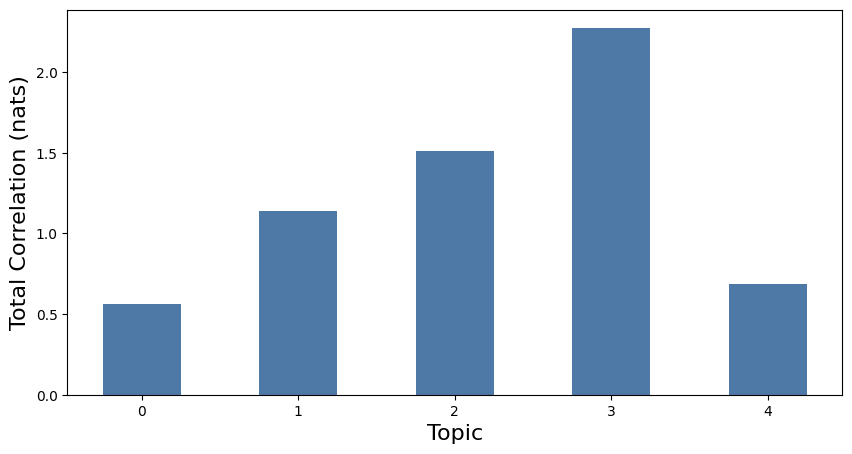

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [ ]:
# extending stopwords
stop_words.extend(['words', 'I', 'want', 'to', 'exclude'])

## Visualising your analysis

In [ ]:
# write the topic IDs and descriptions to text file
for n,topic in enumerate(topics):
    topic_words, foo, bar = zip(*topic)
    outText = 'topic_' + str(n) + ',' + ','.join(topic_words) + '\n'
    with open('topicsList.txt', 'a') as f:
        # write a row to the  file
        f.write(outText)

In [66]:
# export the dataframe to CSV 
# (if you want to visualise in another platform)
df.to_csv('data_out.csv')

In [67]:
# if you had an answer, what would it look like ... ?